In [5]:
import pickle
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

%matplotlib inline

## Day 1

In [50]:
# Write a program that prints the numbers from 1 to 100. But 
# for multiples of three print “Fizz” instead of the number 
# and for the multiples of five print “Buzz”. For numbers 
# which are multiples of both three and five print “FizzBuzz”.

def fizzbuzz_hundred():
    return ['FizzBuzz' if x%3==0 and x%5==0
            else 'Fizz' if x%3==0
            else 'Buzz' if x%5==0
            else x for x in list(range(1,101))]


In [54]:
# Write a function that takes a list of names 
# and returns a list of lists of tuples representing pairs. 
# (Assume an even number of names, all distinct.) For example:
# pairs_for(['Andrea', 'Bob', 'Cassandra', 'Doug'])

import random

def create_pairs(names_list):
    '''
    Takes a list of names and returns 
    a list of lists of tuples
    representing pairs.
    '''
    pairs = []
    while len(names_list)>1:
        indx1 = random.randrange(0, len(names_list))
        name1 = names_list.pop(indx1)
        
        indx2 = random.randrange(0, len(names_list))
        name2 = names_list.pop(indx2)
    
        pairs.append((name1,name2))

    return pairs

In [58]:
# Testing create_pairs above function

test_list = ['Andrea', 'Bob', 'Cassandra', 'Doug','Garrett','Marcie']

create_pairs(test_list)


[('Doug', 'Marcie'), ('Garrett', 'Bob'), ('Andrea', 'Cassandra')]

## Day 2

In [1]:
# What is the largest prime factor of the number 600851475143 ?

def largest_prime_factor(num):
    i=1
    primes = []
    while(i<=num):
        k=0
        if(num%i==0):
            j=1
            while(j<=i):
                if(num%j==0):
                    k=k+1
                j=j+1
            if(k==2):
                primes.append(i)
        i=i+1
    return (max(primes))

## Day 3

In [21]:
# Given a string, write a function to reverse it. Do this using a loop, if possible.
# Example: reverseString('abcdef') will return 'fedcba'
# Example: reverseString('moon') will return 'noom'

str1 = 'abcdef'

#this works but is it technically a loop?
def reverse_str(string):
    return string[::-1]

reverse_str(str1)

'fedcba'

In [22]:
#here it is with a loop...but seems more complicated?

def reverse_str_v2(string):
    let_list = []
    for x in range(0,len(string)):
        let_list.insert(0,string[x])
    return(''.join(let_list))

reverse_str_v2(str1)

'fedcba'

In [ ]:
# PROBLEM 2
# Sal's classroom has a bag of alphabet magnets. She wants to know 
# if she can spell her friend's name using the letters in the bag. 
# Write a function that will take a list of letters and a name and 
# print out yes if the name can be spelled and no otherwise.

# Example 1: CanYouSpell(['y','n','p','g','n','l'],"lynn") would print YES
# Example 2: CanYouSpell(['y','n','p','g','l'],"lynn") would print NO

## Day 4

In [103]:
# Write a function that takes in a number between 1 and 100 
# and tries to guess it. Based on whether a guess is larger 
# or smaller than the input number, the code would come up 
# with a new guess until it gets it right.

def guess_my_num(number):
    guess = random.randint(1,100)
    count = 0
    while guess != number:
        count += 1
        if guess > number:
            guess -= 1
            guess = random.randint(1, guess)
        else:
            guess += 1
            guess = random.randint(guess, 100)
    return f'I got it right in {count} tries.'
    

In [106]:
# Testing guess_my_num function

guess_my_num(87)

'I got it right in 59 tries.'

In [14]:
# Find the thirteen adjacent digits in a given 
# 1000-digit number that have the greatest product. 
# What is the value of this product?

thous_digit_num = \
'''73167176531330624919225119674426574742355349194934\
96983520312774506326239578318016984801869478851843\
85861560789112949495459501737958331952853208805511\
12540698747158523863050715693290963295227443043557\
66896648950445244523161731856403098711121722383113\
62229893423380308135336276614282806444486645238749\
30358907296290491560440772390713810515859307960866\
70172427121883998797908792274921901699720888093776\
65727333001053367881220235421809751254540594752243\
52584907711670556013604839586446706324415722155397\
53697817977846174064955149290862569321978468622482\
83972241375657056057490261407972968652414535100474\
82166370484403199890008895243450658541227588666881\
16427171479924442928230863465674813919123162824586\
17866458359124566529476545682848912883142607690042\
24219022671055626321111109370544217506941658960408\
07198403850962455444362981230987879927244284909188\
84580156166097919133875499200524063689912560717606\
05886116467109405077541002256983155200055935729725\
71636269561882670428252483600823257530420752963450\
'''

#exclude if includes zeros
import numpy as np

# version as asked to just show product result
def greatest_product(number,adjacent_digits):
    thous_list = list(number)
    products_list = []
    for i in range(0,987):
        if '0' not in thous_list[i:i+adjacent_digits+1]:
            numbers = [int(x) for x in thous_list[i:i+adjacent_digits+1]]
            product = np.prod(numbers)
            products_list.append(product)
    return (max(products_list))


#test of function above


greatest_product(thous_digit_num,13)

70573265280

In [15]:
# version to also show numbers to get to product
import timeit

def greatest_product_v2(number,adjacent_digits):
    thous_list = list(number)
    products_dict = {}
    for i in range(0,987):
        if '0' not in thous_list[i:i+adjacent_digits+1]:
            numbers = [int(x) for x in thous_list[i:i+adjacent_digits+1]]
            product = np.prod(numbers)
            products_dict[product] = numbers
    return (f'{max(products_dict)}, the product of {products_dict[max(products_dict)]}')

#test of function above

greatest_product_v2(thous_digit_num,13)

'70573265280, the product of [9, 7, 5, 3, 6, 9, 7, 8, 1, 7, 9, 7, 7, 8]'

## Week 2: Thursday

In [8]:
import numpy as np

In [ ]:
X = [[5,3,7],
     [2,4,1]]

In [ ]:
y = [537,241]

In [9]:
X = np.array[[2,0]] 

TypeError: 'builtin_function_or_method' object is not subscriptable

In [13]:
np.array([2,0])

array([2, 0])

In [17]:
X = np.array([[2, 4]])
w = np.array([0,2])

In [18]:
np.dot(X,w)

array([8])

In [29]:
np.linspace(0,10,101)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [1]:
26**6

308915776

In [2]:
52*51*50**49*48/5!

22612312022829428315162658691406250000000000000000000000000000000000000000000000000000000

In [ ]:
6!/6**6

### WEEK 3: Day 2

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [14]:
type(sklearn.datasets.load_diabetes())

sklearn.utils.Bunch

In [15]:
diabetes = load_diabetes()

In [16]:
X, y = sklearn.datasets

In [17]:
data1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [18]:
type(data1)

pandas.core.frame.DataFrame

### WEEK 4: Day 2

In [6]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/Users/celinaplaza/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
mimic_df = pd.read_csv('MIMIC_Data_small.csv')
mimic_df

,resprate_mean,bun_min,tempc_mean,spo2_min,diasbp_mean,sodium_max,hospital_expire_flag
0,14.369565,16.0,37.049383,95.0,79.525000,140.0,1
1,15.320000,13.0,36.653534,94.0,66.000000,140.0,0
2,15.404762,18.0,36.545714,95.0,54.500000,143.0,0
3,16.677419,13.0,37.033333,92.0,47.933333,141.0,0
4,22.241379,25.0,37.333334,89.0,48.428571,143.0,0
...,...,...,...,...,...,...,...
59721,19.068966,41.0,37.087037,87.0,43.391304,128.0,1
59722,23.742857,20.0,38.000000,91.0,53.322581,140.0,0
59723,12.000000,14.0,36.935185,92.0,99.850000,144.0,0
59724,14.909091,21.0,36.111111,93.0,60.833333,138.0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(mimic_df.iloc[:, 0:6], mimic_df.loc[:, 'hospital_expire_flag'], 
                                                    test_size = 0.2, random_state=42)

In [13]:
baseline = y_train.value_counts()[1]/len(y_train)

In [20]:
prob_30_32 = mimic_df[(mimic_df['resprate_mean'] < 32) & (mimic_df['resprate_mean'] > 30)]
prob_30_32

,resprate_mean,bun_min,tempc_mean,spo2_min,diasbp_mean,sodium_max,hospital_expire_flag
287,31.400000,118.0,38.910257,87.0,45.130435,131.0,1
312,30.105263,13.0,38.047222,89.0,59.315789,145.0,0
510,30.692308,24.0,36.507937,92.0,80.846154,144.0,0
602,30.580645,25.0,37.017460,47.0,65.566667,138.0,0
868,30.543478,12.0,38.500001,85.0,83.625000,140.0,1
...,...,...,...,...,...,...,...
58836,31.708333,51.0,36.611111,47.0,58.115385,145.0,1
59494,30.875000,70.0,36.547619,93.0,65.130435,143.0,0
59635,31.100000,66.0,37.216049,94.0,48.833333,143.0,0
59639,31.285714,17.0,37.807778,88.0,57.888889,134.0,0


In [24]:
prob_30_32_expire = prob_30_32.hospital_expire_flag.value_counts()[1]/len(prob_30_32.hospital_expire_flag)
prob_30_32_expire

0.3783783783783784

In [25]:
prob_16_18 = mimic_df[(mimic_df['resprate_mean'] < 18) & (mimic_df['resprate_mean'] > 16)]
prob_16_18

,resprate_mean,bun_min,tempc_mean,spo2_min,diasbp_mean,sodium_max,hospital_expire_flag
3,16.677419,13.0,37.033333,92.0,47.933333,141.0,0
5,17.130435,4.0,37.351852,99.0,61.518519,145.0,0
7,16.764706,9.0,36.577778,96.0,98.777778,138.0,0
9,16.363636,13.0,36.305556,96.0,77.928571,141.0,0
23,16.371429,14.0,37.396875,85.0,64.611111,142.0,0
...,...,...,...,...,...,...,...
59694,17.782609,14.0,37.590000,92.0,62.750000,138.0,0
59698,16.212121,34.0,37.111111,93.0,76.909091,142.0,0
59709,16.392157,56.0,37.005556,98.0,43.893617,143.0,0
59717,17.727273,9.0,36.955556,85.0,83.333333,141.0,0


In [31]:
mimic_df.resprate_mean.min()

7.0

In [44]:
test1 = mimic_df[(mimic_df['resprate_mean'] < 9) & (mimic_df['resprate_mean'] > 7)]

In [45]:
test1.hospital_expire_flag.value_counts()[1]/len(test1.hospital_expire_flag)

0.375

In [47]:
probabilities = []

for x in range(7,45):
    window = mimic_df[(mimic_df['resprate_mean'] < x+2) & (mimic_df['resprate_mean'] > x)]
    prob_expire = window.hospital_expire_flag.value_counts()[1]/len(window.hospital_expire_flag)
    probabilities.append(prob_expire)

In [48]:
probabilities

[0.375,
 0.22580645161290322,
 0.13953488372093023,
 0.10477941176470588,
 0.0867579908675799,
 0.07708779443254818,
 0.07249829816201497,
 0.07050691244239632,
 0.07435591821765838,
 0.08172791309513706,
 0.06308521211487159,
 0.06772212519015156,
 0.12064825930372149,
 0.13489261547513975,
 0.1590783410138249,
 0.1886341929321872,
 0.21690396849439564,
 0.23497479643272587,
 0.25222863135815415,
 0.2831615120274914,
 0.31296992481203006,
 0.3163538873994638,
 0.3255395683453237,
 0.3783783783783784,
 0.3656716417910448,
 0.3448275862068966,
 0.3142857142857143,
 0.2916666666666667,
 0.36923076923076925,
 0.375,
 0.4,
 0.4,
 0.5333333333333333,
 0.45454545454545453,
 0.42857142857142855,
 0.6,
 1.0,
 1.0]

(array([12.,  5.,  7.,  9.,  1.,  2.,  0.,  0.,  0.,  2.]),
 array([0.06308521, 0.15677669, 0.25046817, 0.34415965, 0.43785113,
        0.53154261, 0.62523408, 0.71892556, 0.81261704, 0.90630852,
        1.        ]),
 <a list of 10 Patch objects>)

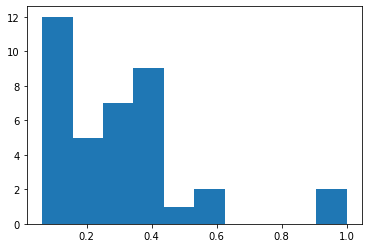

In [49]:
plt.hist(probabilities)

/Users/celinaplaza/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/celinaplaza/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/celinaplaza/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/celinaplaza/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


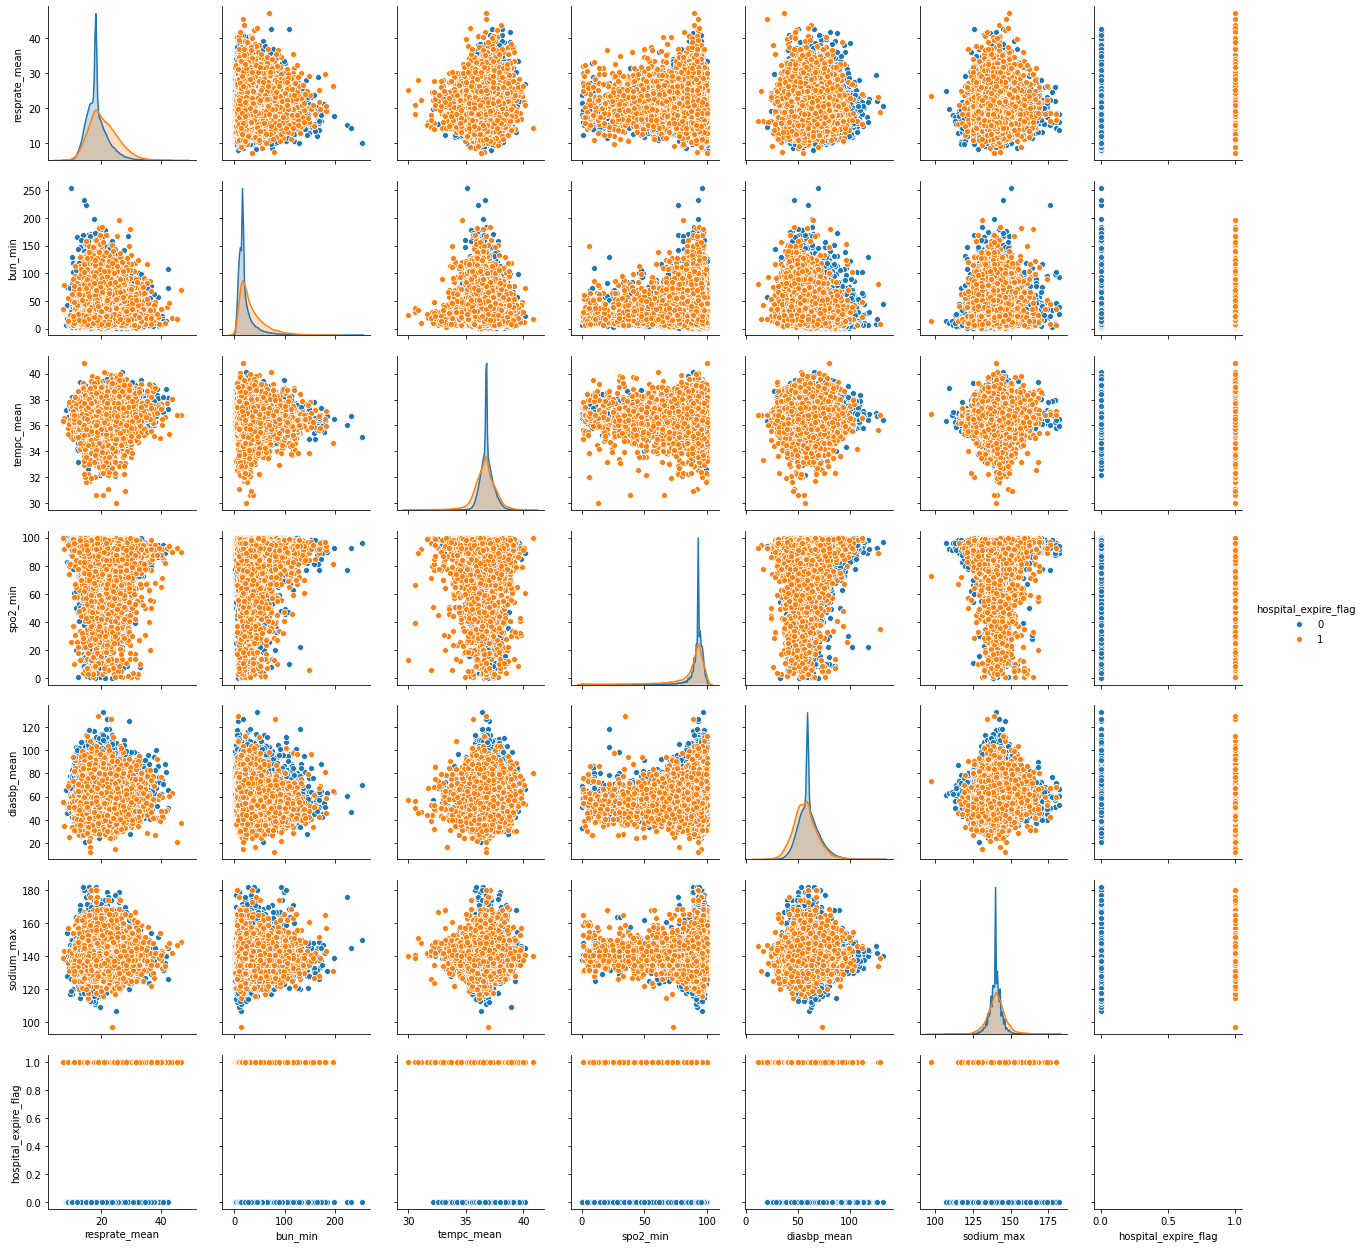

In [51]:
sns.pairplot(mimic_df, hue='hospital_expire_flag');

### Week 5, Monday

In [7]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
train_data = pd.read_csv('wookiee-train.csv')
test_data = pd.read_csv('wookiee-test.csv')
hold_data = pd.read_csv('wookiee-ho.csv')

In [3]:
train_data.shape

(750, 5)

In [5]:
test_data.shape

(250, 5)

In [6]:
hold_data.shape

(1000, 4)

In [15]:
train_data.head()

,Unnamed: 0,wookieecolor,xcoord,ycoord,zcoord
0,0,red,-3.410692,0.854400,0.228154
1,1,red,0.350080,-0.751120,-1.845183
2,2,chartreuse,0.841712,-0.058204,0.246217
3,3,red,-0.646260,-1.821082,0.444616
4,4,blue,1.423538,2.269409,-1.061053


In [21]:
X_train = train_data.drop(columns=['wookieecolor','Unnamed: 0']).copy()
y_train = train_data['wookieecolor'].copy()

X_test = test_data.drop(columns=['wookieecolor','Unnamed: 0']).copy()
y_test = test_data['wookieecolor'].copy()

In [22]:
X_train.head()

,xcoord,ycoord,zcoord
0,-3.410692,0.854400,0.228154
1,0.350080,-0.751120,-1.845183
2,0.841712,-0.058204,0.246217
3,-0.646260,-1.821082,0.444616
4,1.423538,2.269409,-1.061053


In [19]:
y_train.head()

0           red
1           red
2    chartreuse
3           red
4          blue
Name: wookieecolor, dtype: object

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.744


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

confusion_matrix(y_test, y_pred)

array([[31,  3, 10,  6],
       [ 2, 14,  4,  9],
       [ 5,  1, 81, 10],
       [ 3,  3,  8, 60]])

In [28]:
# print("Threshold of 0.5:")
# print(f'''Precision: {precision_score(y_test, y_pred)}, 
# Recall: {recall_score(y_test, y_pred)}''')

In [38]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [39]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [42]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy')
grid.fit(X_train, y_train)

/Users/celinaplaza/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [43]:
grid.cv_results_

{'mean_fit_time': array([0.00721103, 0.00733471, 0.00582868, 0.0128898 , 0.00431496,
        0.00394809, 0.00493872, 0.00380647, 0.004188  , 0.0044691 ,
        0.00385147, 0.00374031, 0.00425595, 0.00444251, 0.00391406,
        0.00553423, 0.00415701, 0.00462443, 0.00626296, 0.00773042,
        0.00473303, 0.00442755, 0.00584334, 0.0051282 , 0.00950372,
        0.00474894, 0.00400972, 0.00561273, 0.00376809, 0.00455886,
        0.00324875, 0.00475067, 0.00453889, 0.00395733, 0.00360727,
        0.00408071, 0.00313002, 0.00368804, 0.00315458, 0.00304174,
        0.00527704, 0.00518537, 0.00427103, 0.00360382, 0.00518191,
        0.00360882, 0.00421214, 0.0045318 , 0.00551277, 0.0069859 ,
        0.00477058, 0.00424695, 0.0037747 , 0.00477469, 0.01148152,
        0.00525677, 0.00705254, 0.00786746, 0.00628591, 0.01752269]),
 'std_fit_time': array([0.00224905, 0.00398578, 0.00159717, 0.01225305, 0.00172366,
        0.00058667, 0.00174505, 0.00037756, 0.00046795, 0.00080526,
        0.000

In [44]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# examine the first tuple
def examine_first_tuple(model_grid):
    print("std_test_score", model_grid.cv_results_['std_test_score'])
    print("rank_test_score", model_grid.cv_results_['rank_test_score'])
    print("mean_test_score", model_grid.cv_results_['mean_test_score'])
    
examine_first_tuple(grid)

std_test_score [0.013365   0.013365   0.01780559 0.013365   0.0273886  0.02607851
 0.03134065 0.02479449 0.0322275  0.02151176 0.03242803 0.02736325
 0.02999682 0.02366232 0.04507187 0.03139478 0.03875366 0.03888708
 0.03524958 0.04125062 0.03008802 0.04050756 0.02848817 0.03865041
 0.03287196 0.03764735 0.02734562 0.03474871 0.02543576 0.0373522
 0.0309657  0.03369456 0.02763545 0.03968595 0.03559321 0.03581494
 0.02815376 0.04042574 0.02846044 0.04346566 0.03533809 0.04727309
 0.03289653 0.04568642 0.03189611 0.04432435 0.0320835  0.04281274
 0.0320835  0.04142284 0.03179202 0.04098576 0.04072682 0.04437808
 0.02785165 0.04753198 0.02672333 0.04346318 0.02982642 0.04357964]
rank_test_score [51 51 60 51 37 34 26 10  6  4  3  1 22  2 28  5 28  8 35  8 36 12 37  6
 37 22 42 17 43 17 37 28 44 17 41 31 54 33 56 25 49 22 45 10 49 12 45 16
 45 12 45 17 54 17 57 12 59 27 57 31]
mean_test_score [0.692      0.692      0.64933333 0.692      0.70533333 0.71066667
 0.71733333 0.72533333 0.7306666

In [45]:
# examine the best model
def get_best_model(model_grid):
    best_k = model_grid.cv_results_['rank_test_score'][0]
    print (best_k, model_grid.cv_results_['mean_test_score'][best_k], model_grid.cv_results_['std_test_score'][best_k])

get_best_model(grid)

51 0.7213333333333334 0.040985761336269765


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        blue       0.76      0.62      0.68        50
  chartreuse       0.67      0.48      0.56        29
         red       0.79      0.84      0.81        97
       white       0.71      0.81      0.75        74

    accuracy                           0.74       250
   macro avg       0.73      0.69      0.70       250
weighted avg       0.74      0.74      0.74       250



### Week 5, Wednesday

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
pair_boot = pd.read_csv('pair_boot.csv')

In [ ]:
pair_boot.head()